CONFIDENCE INTERVALS

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Size of Sample 
n = 130
# Mean of Sample 
xbar = 98.25
# Sample standard deviation
s = 0.73
# Confidence level
cl = 0.99

In [3]:
stats.norm.interval(alpha=cl, loc=xbar, scale=s/np.sqrt(n))

(98.08508192246582, 98.41491807753418)

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [4]:
n = 500
xbar = 5.4
s = 3.1
cl = 0.95


In [5]:
stats.norm.interval(alpha=cl, loc=xbar, scale=s/np.sqrt(n))

(5.12827801242126, 5.67172198757874)

HYPOTHESIS TESTING



EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [6]:
mu = 13.20
xbar = 12.20
sigma = 2.50
n = 40
α = 0.01

In [7]:
z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test


-2.5298221281347035

In [8]:
pvalue = stats.norm.cdf(z_test) # left side area
pvalue
# z_test's cdf gives the left-hand area as probability . We call this p_value. 

0.005706018193000826

In [9]:
# Comparing "p_value" with "α" value
 
alpha = 0.01   # (α = 1% --> 1-99%) it is given in the question

if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [10]:
α = 0.01
df_soil = pd.read_csv("soil - Sheet1.csv")
df_soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [11]:
df_soil.shape

(35, 2)

In [12]:
x1 = df_soil["Soil1"].mean()
x1

1.6918

In [13]:
x2 = df_soil["Soil2"].mean()
x2

1.4171142857142855

In [14]:
# Calculate the T_test for the means of two independent samples of scores.
# H0 : mu1 = mu2
# H1 : mu1 != mu2

# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(x1, x2)
indTest

Ttest_indResult(statistic=nan, pvalue=nan)

In [15]:
# My data has Nan values!

In [16]:
df_soil.isnull()

# Soil1 column has NaN values between rows no:30 - 34

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [17]:
indTest = stats.ttest_ind(df_soil["Soil1"], df_soil["Soil2"], nan_policy='omit')

indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [18]:
t = indTest.statistic
t

5.1681473319343345

In [19]:
pvalue = indTest.pvalue
pvalue

2.5932287323528147e-06

In [20]:
# Comparing "p_value" with "α" value
 
alpha = 0.01   # alpha/2 = 0.005

if pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [21]:
import seaborn as sns

In [22]:
df_pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
df_pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [23]:
df_pisa.shape

(70, 6)

In [24]:
df_pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [25]:
df_pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [26]:
df_pisa['Continent_Code'].fillna(value='NA', inplace = True)

In [27]:
df_pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

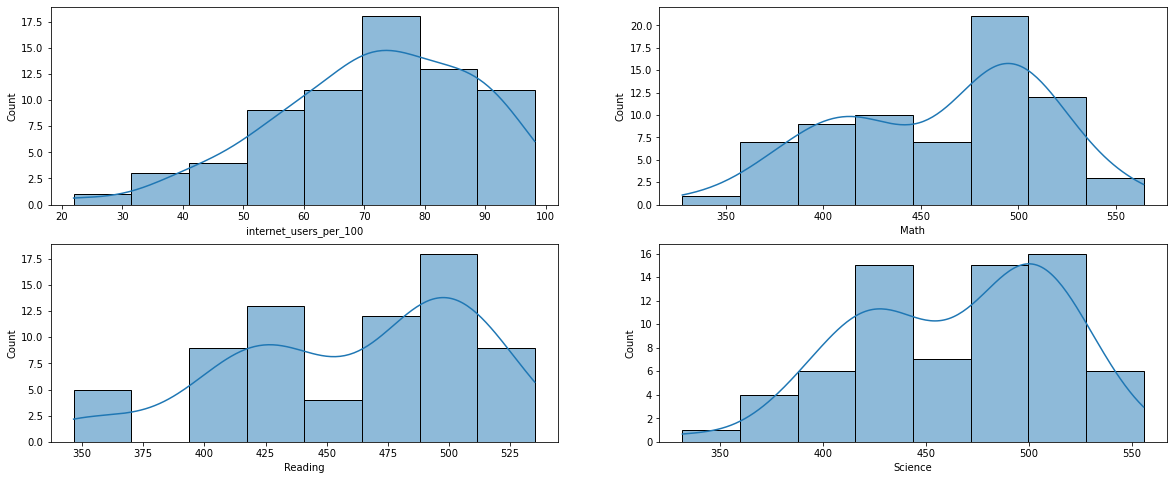

In [28]:
# First of all let's see how distribute the PISA scores for all over the world.

fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.histplot(df_pisa['internet_users_per_100'], kde=True, ax=axes[0,0])
sns.histplot(df_pisa['Math'], kde=True, ax=axes[0,1])
sns.histplot(df_pisa['Reading'], kde=True, ax=axes[1,0])
sns.histplot(df_pisa['Science'], kde=True, ax=axes[1,1]);

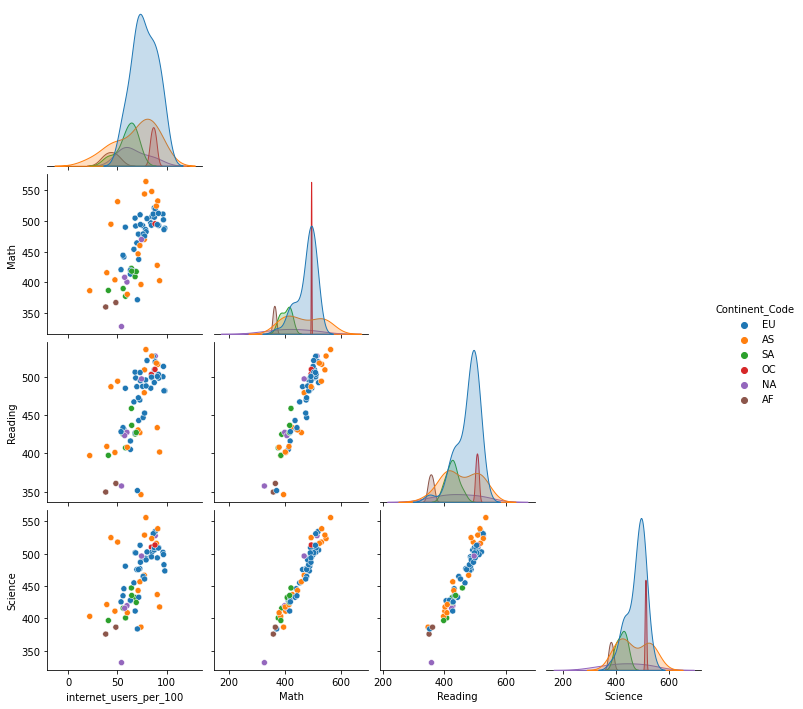

In [29]:
sns.pairplot(df_pisa, hue = 'Continent_Code', corner = True);

# **Analysis for EU**

In [30]:
df_EU = df_pisa[df_pisa["Continent_Code"]=="EU"]
df_EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [31]:
df_EU.describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [32]:
df_EU.shape

(37, 6)

In [33]:
df_EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

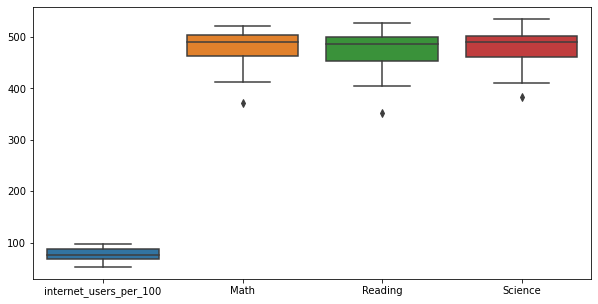

In [34]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_EU);

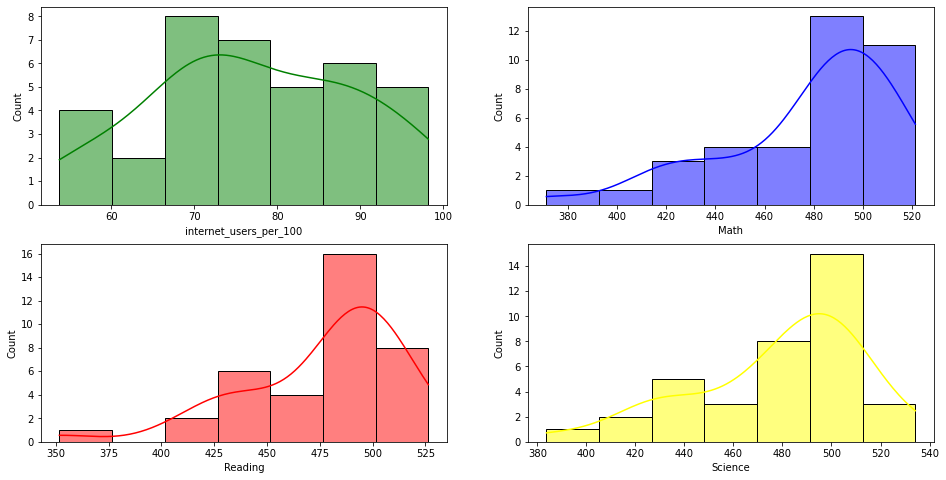

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df_EU, x="internet_users_per_100", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df_EU, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_EU, x="Reading", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df_EU, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

# **Analysis for AS**

In [36]:
df_AS = df_pisa[df_pisa["Continent_Code"]=="AS"]
df_AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [37]:
df_AS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            17 non-null     object 
 1   Continent_Code          17 non-null     object 
 2   internet_users_per_100  17 non-null     float64
 3   Math                    17 non-null     float64
 4   Reading                 17 non-null     float64
 5   Science                 17 non-null     float64
dtypes: float64(4), object(2)
memory usage: 952.0+ bytes


In [38]:
df_AS.shape

(17, 6)

In [39]:
df_AS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [40]:
df_AS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

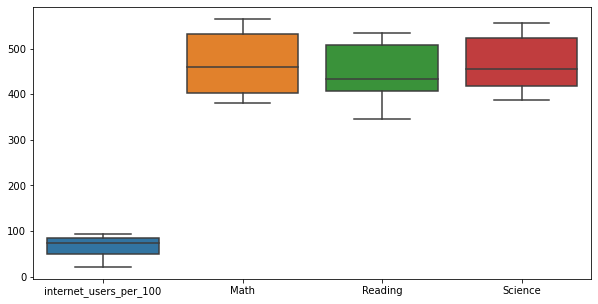

In [41]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_AS);

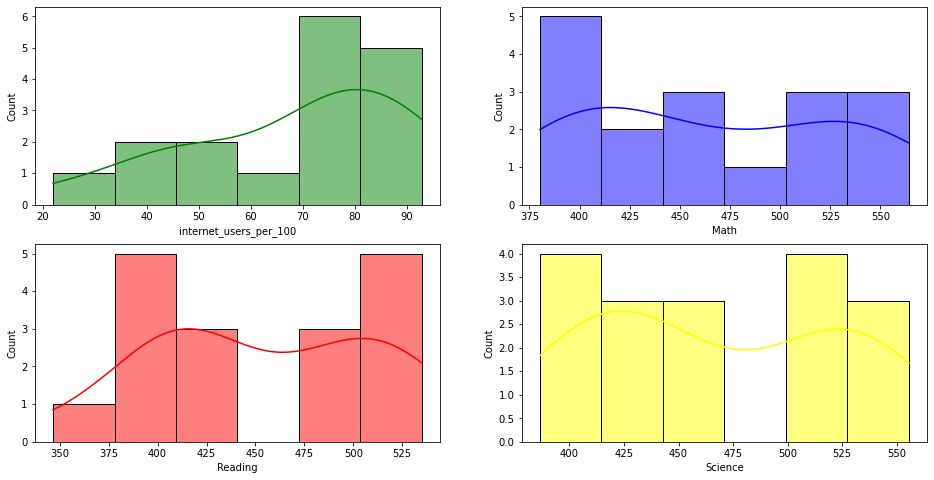

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df_AS, x="internet_users_per_100", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df_AS, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_AS, x="Reading", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df_AS, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

# **Analysis for AF**

In [43]:
df_AF = df_pisa[df_pisa["Continent_Code"]=="AF"]
df_AF.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


In [44]:
df_AF.shape

(2, 6)

In [45]:
df_AF.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [46]:
df_AF.var()

internet_users_per_100    53.249507
Math                      26.005030
Reading                   62.677447
Science                   56.799679
dtype: float64

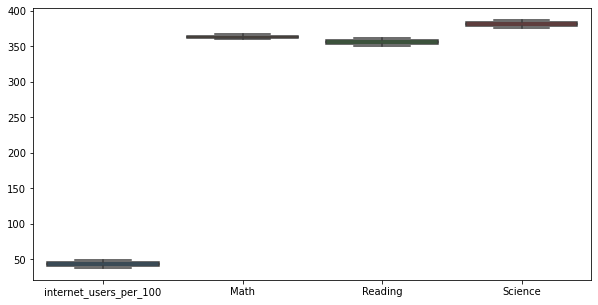

In [47]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_AF);

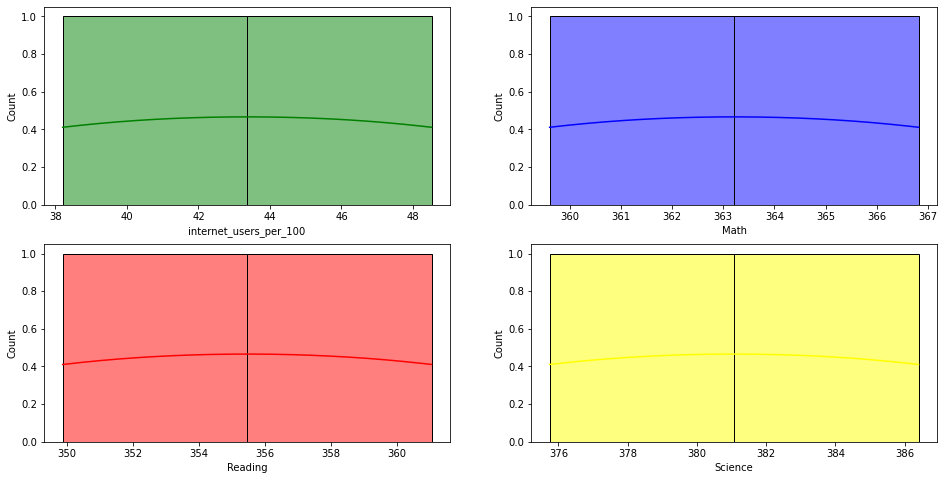

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df_AF, x="internet_users_per_100", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df_AF, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_AF, x="Reading", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df_AF, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

# **Analysis for NA**

In [49]:
df_NA = df_pisa[df_pisa["Continent_Code"]=="NA"]
df_NA.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NA,88.470000,515.6474,526.6678,527.7047
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
18,DOM,NA,54.215766,327.7020,357.7377,331.6388
45,MEX,NA,57.431043,408.0235,423.2765,415.7099
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [50]:
df_NA.shape

(5, 6)

In [51]:
df_NA.describe()

,internet_users_per_100,Math,Reading,Science
count,5.000000,5.000000,5.000000,5.000000
mean,66.886792,424.250960,446.420920,438.180760
std,14.364359,71.717058,66.614744,76.789918
min,54.215766,327.702000,357.737700,331.638800
25%,57.431043,400.253400,423.276500,415.709900
50%,59.762950,408.023500,427.487500,419.608000
75%,74.554202,469.628500,496.935100,496.242400
max,88.470000,515.647400,526.667800,527.704700


In [52]:
df_NA.var()

internet_users_per_100     206.334814
Math                      5143.336351
Reading                   4437.524053
Science                   5896.691519
dtype: float64

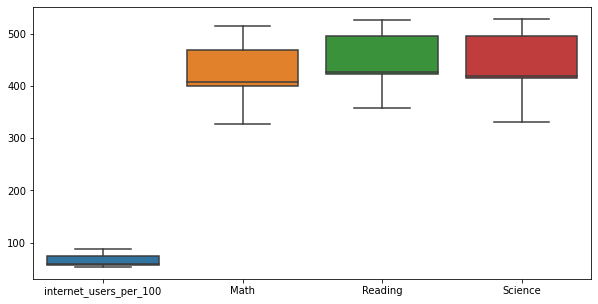

In [53]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_NA);

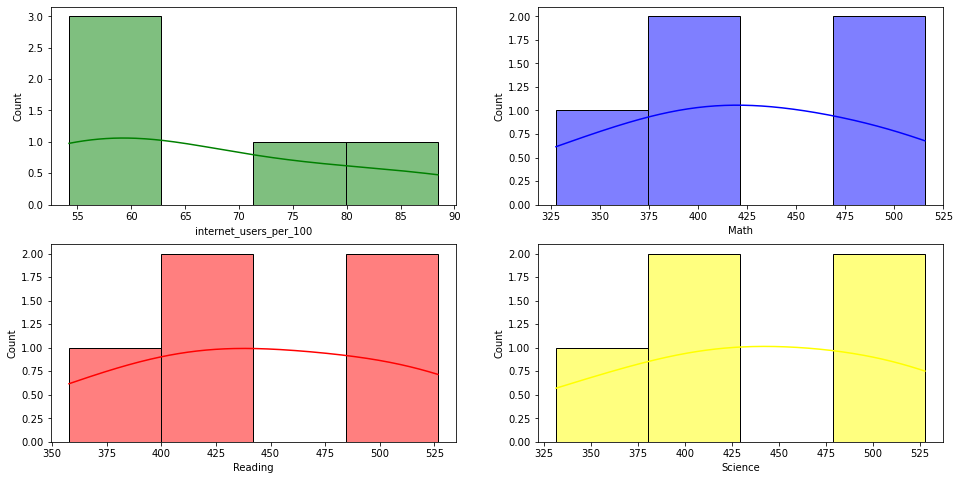

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df_NA, x="internet_users_per_100", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df_NA, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_NA, x="Reading", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df_NA, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

# **Analysis for SA**

In [55]:
df_SA = df_pisa[df_pisa["Continent_Code"]=="SA"]
df_SA.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


In [56]:
df_SA.shape

(7, 6)

In [57]:
df_SA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [58]:
df_SA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

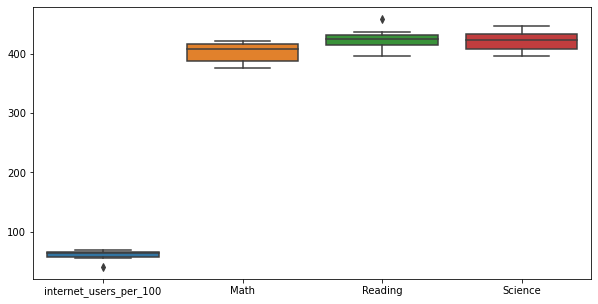

In [59]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_SA);

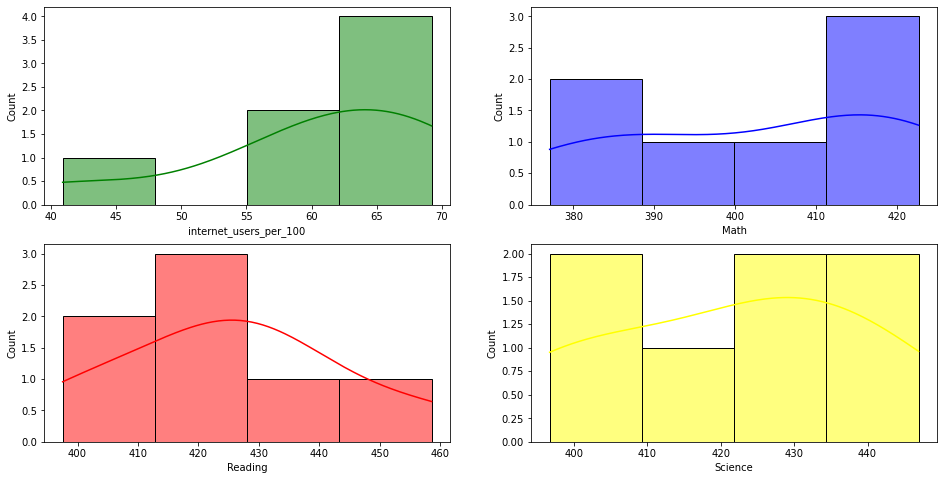

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df_SA, x="internet_users_per_100", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df_SA, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_SA, x="Reading", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df_SA, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

# **Analysis for OC**

In [61]:
df_OC = df_pisa[df_pisa["Continent_Code"]=="OC"]
df_OC.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [62]:
df_OC.shape

(2, 6)

In [63]:
df_OC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [64]:
df_OC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

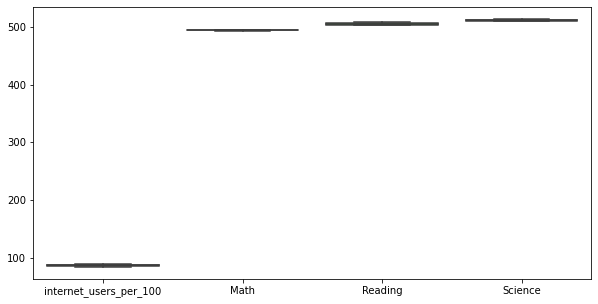

In [65]:
fig = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df_OC);

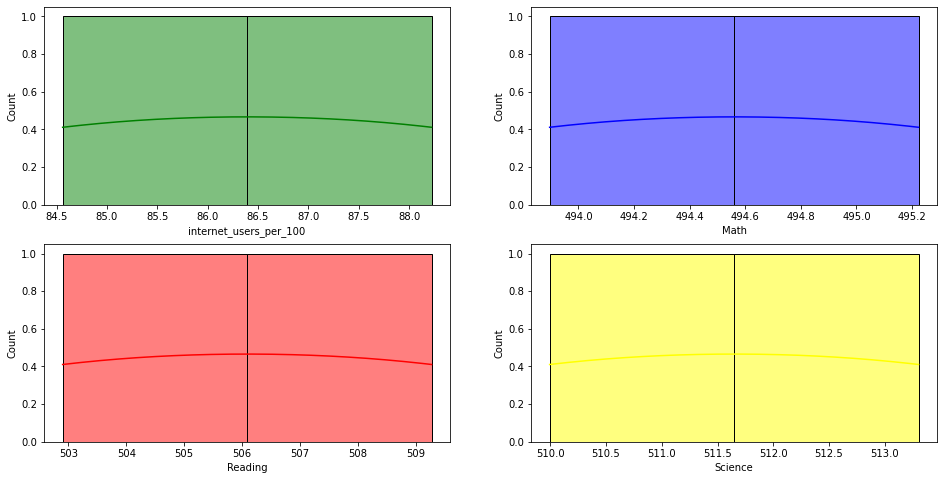

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df_OC, x="internet_users_per_100", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df_OC, x="Math", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=df_OC, x="Reading", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df_OC, x="Science", kde=True, color="yellow", ax=axs[1, 1]);

# **Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.**

In [67]:
statistic, pvalue = stats.ttest_ind(df_EU.Math, df_AS.Math, nan_policy='omit')  # independet T test
statistic, pvalue

(0.870055317967983, 0.38826888111307345)

From standard normal table, the two-tailed critical value at 0.05% level of significance is tα/2 = 0.05/2 = 0.025 = 1.965 which is our critical value for t-value comparison.

In [68]:
critic_pvalue = 0.025

if pvalue < critic_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


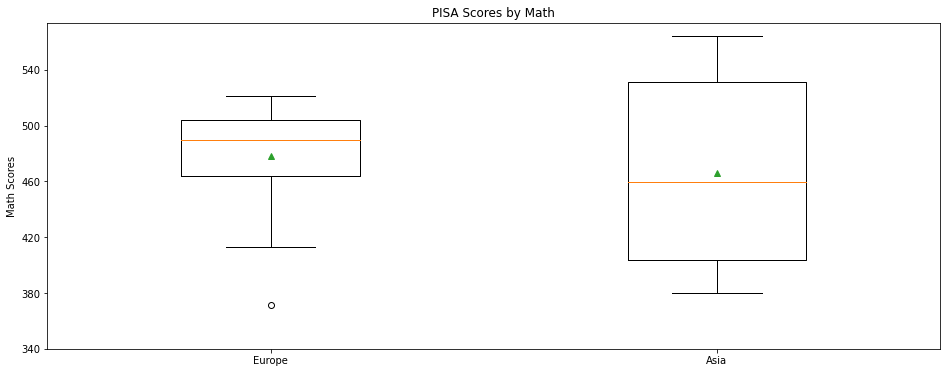

In [69]:
plt.figure(figsize=(16,6))
plt.boxplot([df_EU['Math'],df_AS['Math']], showmeans=True, widths = 0.4)

plt.title('PISA Scores by Math')
plt.ylabel('Math Scores')
plt.xticks([1, 2], ['Europe', 'Asia'])
y_ticks = np.arange(340, 580, 40)
plt.yticks(y_ticks);